# k-Means Clustering: Homework Effort Analysis

### Introduction and Theory
**k-Means Clustering** is an unsupervised learning algorithm that partitions data into **$k$ distinct clusters** based on similarity. It identifies hidden patterns by iteratively refining cluster centers.

In this project, we classify homework assignments into **Low**, **Medium**, and **High Effort** groups using **Difficulty** and **Amount of Work**.

### The Mathematical Model
The algorithm alternates between two steps to minimize the variance within clusters.

#### Cluster Assignment
Each data point $x$ is assigned to the nearest centroid $\mu$ by minimizing the squared Euclidean distance:

$$d(x, \mu) = \sqrt{(x_1 - \mu_1)^2 + (x_2 - \mu_2)^2}$$

* $x$: Data point.
* $\mu$: Cluster centroid.

#### Centroid Update
The new position of each centroid $\mu_j$ is calculated as the mean of all points assigned to that cluster:

$$\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_i$$

* $n$: Number of points in cluster $j$.

### Libraries Import

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

### Data Preperation

In [11]:
# Construct data
homework_data = np.array([
    [3, 3], [2, 2], [1, 4], [1, 1], [5, 6], [6, 5], [7, 7], [9, 12], [10, 10]
])

### k-Means Clustering

In [12]:
# Defining clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(homework_data)

# Extracting centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

### Sorting Clusters

In [13]:
# Sorting clusters
sorted_indices = np.argsort(centers[:, 0] + centers[:, 1])
sorted_labels = {sorted_indices[i]: i for i in range(3)}

# Update labels
corrected_labels = np.array([sorted_labels[label] for label in labels])

### Visualizing the Results

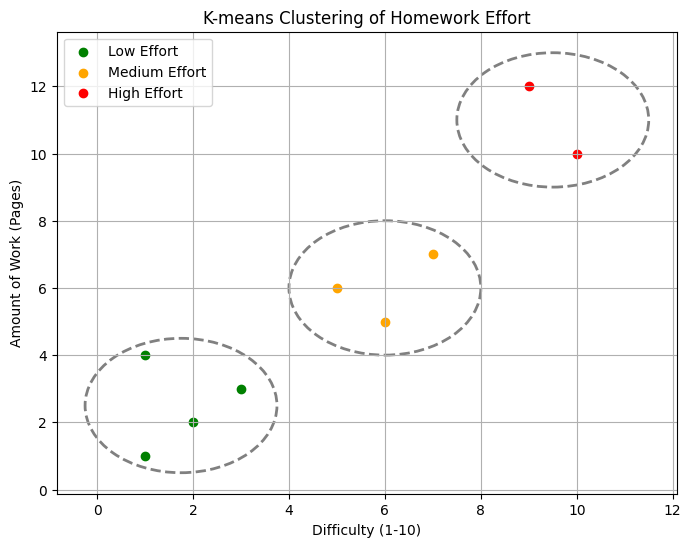

In [14]:
# Plotting the results
plt.figure(figsize=(8, 6))
effort_categories = ["Low Effort", "Medium Effort", "High Effort"]
colors = ['green', 'orange', 'red']

for i in range(3):
    plt.scatter(
        homework_data[corrected_labels == i, 0],
        homework_data[corrected_labels == i, 1],
        label=effort_categories[i],
        color=colors[i]
    )

    center_x, center_y = centers[sorted_indices[i]]
    circle = plt.Circle((center_x, center_y), 2, color='gray', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.xlabel("Difficulty (1-10)")
plt.ylabel("Amount of Work (Pages)")
plt.title("K-means Clustering of Homework Effort")
plt.legend()
plt.grid()
plt.show()